#Homework 10 - Download one of your favorite books (as long as its copyright free) from project Gutenberg or elsewhere. Work with python text tools and send me an analysis of the text (i.e. compare chapters in various ways, summation, etc.).  Send me your analysis the more interesting the more points.  See python text tools file in classes-> files for pointers to some articles on how to do this.

In [21]:
# Load the cleaned Hamlet text
with open('pg27761-images.txt', 'r', encoding='utf-8') as f:
    raw_text = f.read()

# Optional: remove Project Gutenberg header/footer
import re
text = re.split(r'\*\*\* START OF.*?\*\*\*', raw_text, flags=re.IGNORECASE)[-1]
text = re.split(r'\*\*\* END OF.*?\*\*\*', text, flags=re.IGNORECASE)[0]
text = re.sub(r'\n{2,}', '\n\n', text.strip())  # normalize spacing



In [22]:
# Split into acts
acts = re.split(r'\n+ACT\s+([IVX]+)\.\n+', text)
structured_play = []

for i in range(1, len(acts), 2):
    act_num = acts[i]
    act_text = acts[i + 1]
    scenes = re.split(r'\n+Scene\s+\d+.*?\n+', act_text)
    scenes = [scene.strip() for scene in scenes if scene.strip()]
    structured_play.append((f"Act {act_num}", scenes))

print(structured_play[0][0])             # Act I
print(structured_play[0][1][0][:1000])   # Scene I text (first 1000 chars)


Act II
Scene I.—A ROOM IN POLONIUS'S HOUSE.
Enter Polonius1 (L.H.), meeting Ophelia. (R.H.)
Pol. How now, Ophelia! What's the matter?
Oph. O, my lord, my lord, I have been so affrighted!
Pol. With what, in the name of Heaven?
Oph. My lord, as I was sewing in my closet,
Lord Hamlet, with his doublet all unbrac'd;
Pale as his shirt; his knees knocking each other,
And with a look so piteous in purport,
He comes before me.
Pol. Mad for thy love?
Oph.
My lord, I do not know;
But, truly, I do fear it.
Pol.
What said he?
Oph. He took me by the wrist, and held me hard;
Then goes he to the length of all his arm;
And, with his other hand thus o'er his brow,
He falls to such perusal of my face
As he would draw it. Long staid he so;
At last,—a little shaking of mine arm,
And thrice his head thus waving up and down,
He rais'd a sigh so piteous and profound,
As it did seem to shatter all his bulk,2
And end his being: That done, he lets me go:
And, with his head over his shoulder turn'd,
33 
He seem'

#Word Count Analysis

In [3]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

# Setup
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_word_counts(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return Counter(words)

# Collect all words (not just top 10)
word_counts_all = []

for act_title, scenes in structured_play:
    for idx, scene_text in enumerate(scenes, 1):
        word_counts = get_word_counts(scene_text)
        word_counts_all.append({
            'Act': act_title,
            'Scene': f'Scene {idx}',
            'Word Counts': dict(word_counts)
        })

sample = word_counts_all[0]
print(f"{sample['Act']} - {sample['Scene']}")
print(f"Total Unique Words: {len(sample['Word Counts'])}")
print(f"Sample: {list(sample['Word Counts'].items())[:15]}")  # preview first 15 words


Act II - Scene 1
Total Unique Words: 1562
Sample: [('scene', 4), ('i—a', 1), ('room', 2), ('poloniuss', 1), ('house', 1), ('enter', 7), ('polonius1', 1), ('lh', 10), ('meeting', 2), ('ophelia', 5), ('rh', 8), ('pol', 45), ('whats', 2), ('matter', 4), ('oph', 5)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


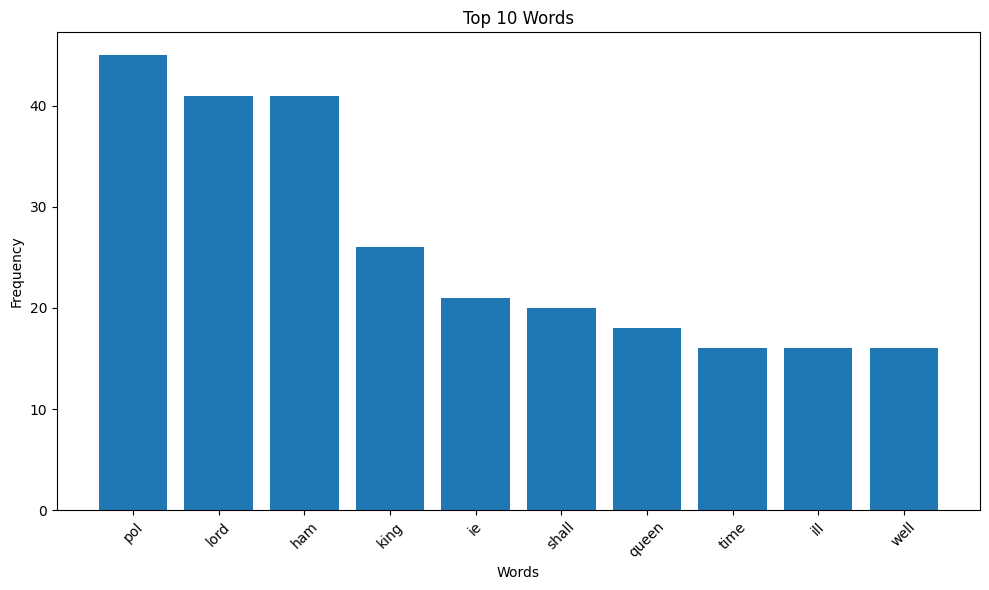

In [4]:
import matplotlib.pyplot as plt

# Pick any one scene (e.g., first one)
scene_data = word_counts_all[0]
word_counts = scene_data['Word Counts']
top_words = Counter(word_counts).most_common(10)

# Separate words and counts
words, counts = zip(*top_words)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title("Top 10 Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Sentiment Analysis for the book

In [5]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [6]:
sentiments = []

for act_title, scenes in structured_play:
    for idx, scene_text in enumerate(scenes, 1):
        scores = sia.polarity_scores(scene_text)
        sentiments.append({
            'Act': act_title,
            'Scene': f'Scene {idx}',
            'Neg': scores['neg'],
            'Neu': scores['neu'],
            'Pos': scores['pos'],
            'Compound': scores['compound']
        })

# Sample output
for s in sentiments[:3]:
    print(s)


{'Act': 'Act II', 'Scene': 'Scene 1', 'Neg': 0.097, 'Neu': 0.757, 'Pos': 0.147, 'Compound': 0.9999}
{'Act': 'Act III', 'Scene': 'Scene 1', 'Neg': 0.104, 'Neu': 0.755, 'Pos': 0.141, 'Compound': 0.9999}
{'Act': 'Act IV', 'Scene': 'Scene 1', 'Neg': 0.094, 'Neu': 0.765, 'Pos': 0.141, 'Compound': 0.9996}


In [7]:
from textblob import TextBlob
import pandas as pd

sentiments_blob = []

for act_title, scenes in structured_play:
    for idx, scene_text in enumerate(scenes, 1):
        blob = TextBlob(scene_text)
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        sentiments_blob.append({
            'Act': act_title,
            'Scene': f'Scene {idx}',
            'Polarity': polarity,
            'Subjectivity': subjectivity
        })

sentiment_df = pd.DataFrame(sentiments_blob)
sentiment_df['Scene ID'] = range(1, len(sentiment_df) + 1)


In [8]:
most_positive = sentiment_df.loc[sentiment_df['Polarity'].idxmax()]
most_negative = sentiment_df.loc[sentiment_df['Polarity'].idxmin()]


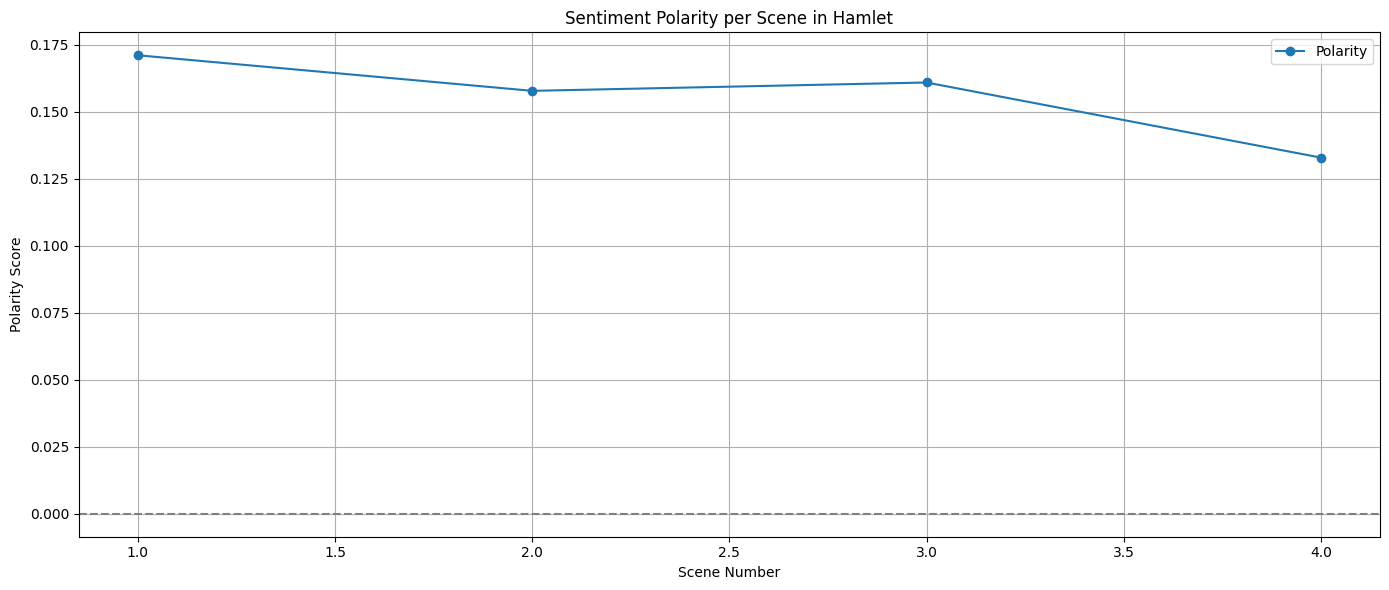

(Act               Act II
 Scene            Scene 1
 Polarity        0.171007
 Subjectivity    0.554261
 Scene ID               1
 Name: 0, dtype: object,
 Act                Act V
 Scene            Scene 1
 Polarity        0.132839
 Subjectivity    0.522248
 Scene ID               4
 Name: 3, dtype: object)

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(sentiment_df['Scene ID'], sentiment_df['Polarity'], marker='o', label='Polarity')
plt.title('Sentiment Polarity per Scene in Hamlet')
plt.xlabel('Scene Number')
plt.ylabel('Polarity Score')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Show most positive and most negative scenes
most_positive = sentiment_df.loc[sentiment_df['Polarity'].idxmax()]
most_negative = sentiment_df.loc[sentiment_df['Polarity'].idxmin()]

most_positive, most_negative


#Character Analysis

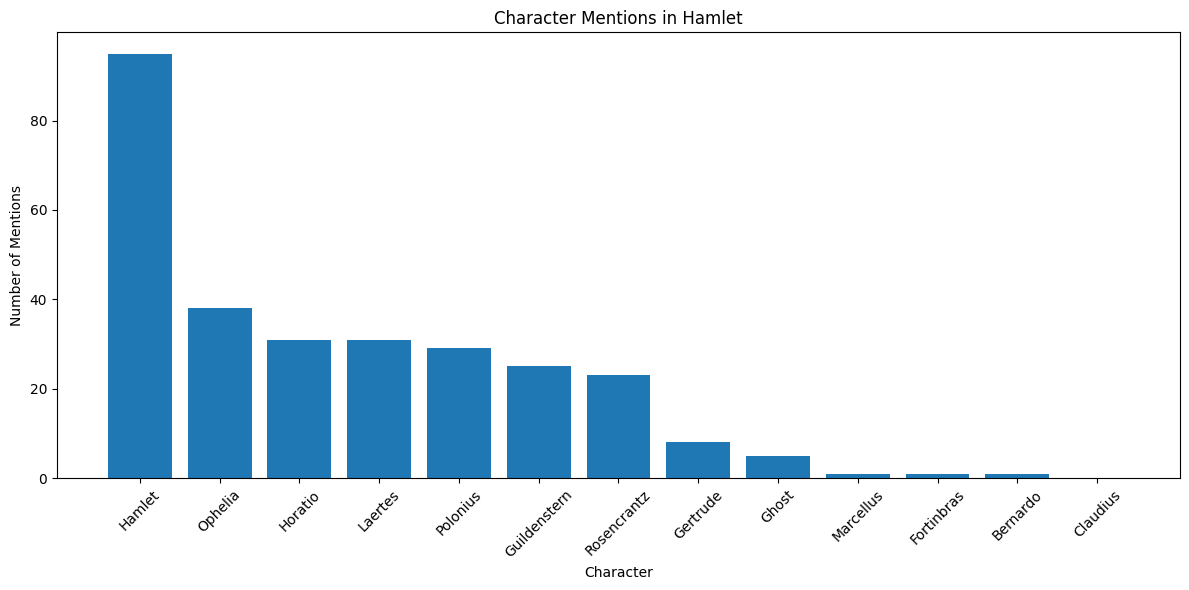

,Character,Mentions,Avg Sentiment
0,Hamlet,95,0.155609
4,Ophelia,38,0.155609
5,Horatio,31,0.150476
6,Laertes,31,0.146845
3,Polonius,29,0.155609
9,Guildenstern,25,0.163199
8,Rosencrantz,23,0.163199
2,Gertrude,8,0.150476
7,Ghost,5,0.157738
11,Marcellus,1,0.160851


In [10]:
# Define characters to analyze
characters = [
    "Hamlet", "Claudius", "Gertrude", "Polonius", "Ophelia",
    "Horatio", "Laertes", "Ghost", "Rosencrantz", "Guildenstern",
    "Fortinbras", "Marcellus", "Bernardo"
]

# Initialize mention and sentiment tracking
char_mentions = {char: 0 for char in characters}
char_sentiments = {char: [] for char in characters}

# Loop through scenes and count mentions + sentiment per character
for _, scenes in structured_play:
    for scene in scenes:
        blob = TextBlob(scene)
        for char in characters:
            count = scene.count(char)
            if count > 0:
                char_mentions[char] += count
                char_sentiments[char].append(blob.sentiment.polarity)

# Prepare data for plotting and display
mention_df = pd.DataFrame({
    'Character': list(char_mentions.keys()),
    'Mentions': list(char_mentions.values()),
    'Avg Sentiment': [
        sum(char_sentiments[c])/len(char_sentiments[c]) if char_sentiments[c] else 0
        for c in characters
    ]
})

# Plot character mentions
plt.figure(figsize=(12, 6))
mention_df_sorted = mention_df.sort_values(by='Mentions', ascending=False)
plt.bar(mention_df_sorted['Character'], mention_df_sorted['Mentions'])
plt.title('Character Mentions in Hamlet')
plt.xlabel('Character')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

mention_df.sort_values(by='Mentions', ascending=False)


#Sentiment Analysis as per the character

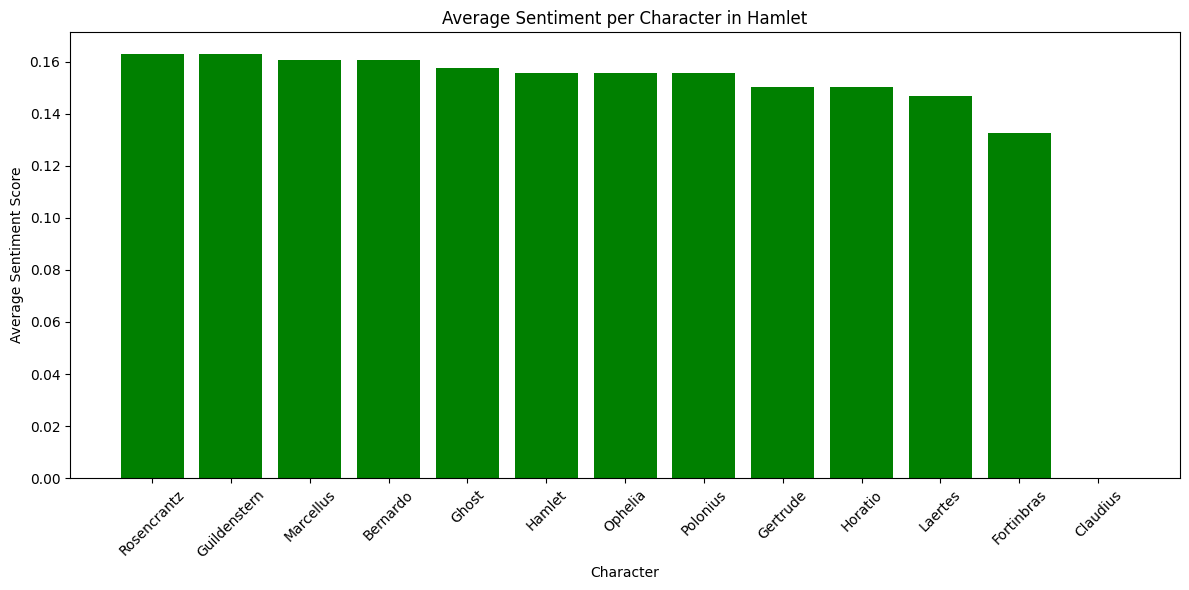

In [11]:
# Plot average sentiment per character
plt.figure(figsize=(12, 6))
mention_df_sorted = mention_df.sort_values(by='Avg Sentiment', ascending=False)
plt.bar(mention_df_sorted['Character'], mention_df_sorted['Avg Sentiment'], color='green')
plt.title('Average Sentiment per Character in Hamlet')
plt.xlabel('Character')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Character appearances over Acts

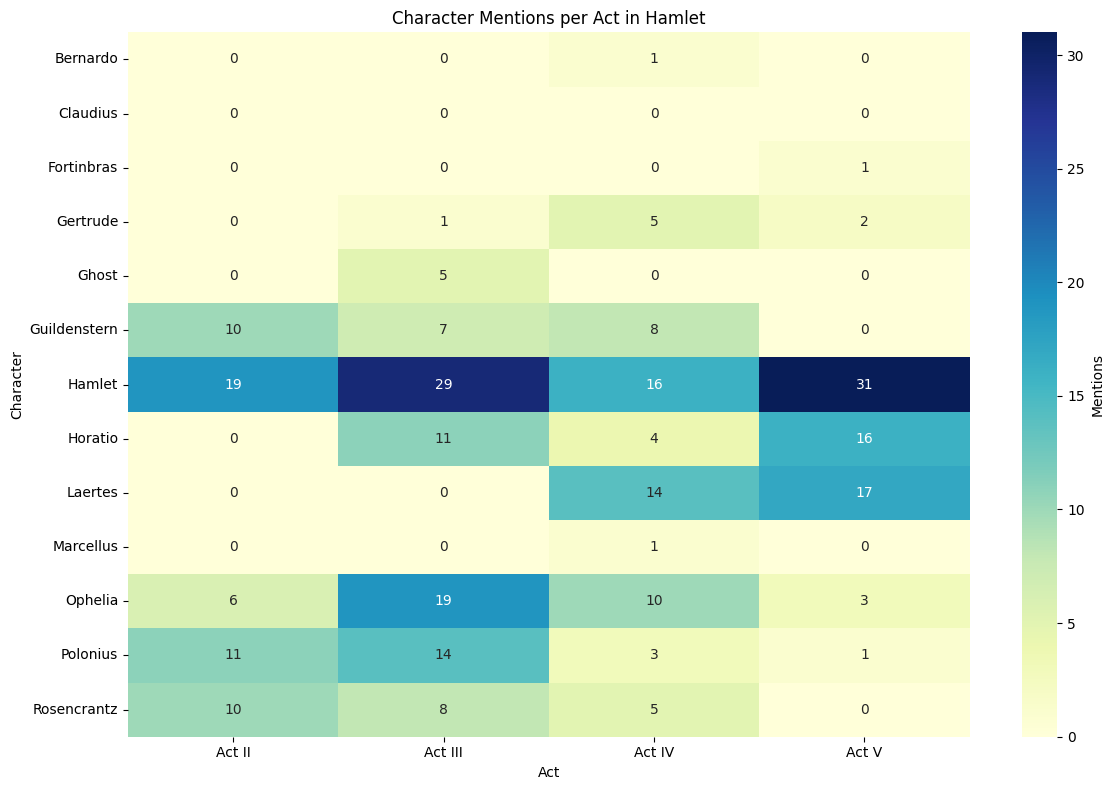

In [12]:
import seaborn as sns

# Step 1: Count character appearances per act
appearance_data = []

for act_title, scenes in structured_play:
    act_text = " ".join(scenes)  # Combine all scenes in the act
    for char in characters:
        count = act_text.count(char)
        appearance_data.append({
            'Act': act_title,
            'Character': char,
            'Mentions': count
        })

# Convert to DataFrame
appearance_df = pd.DataFrame(appearance_data)

# Step 2: Create pivot table for heatmap
pivot_table = appearance_df.pivot(index='Character', columns='Act', values='Mentions').fillna(0)

# Step 3: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Mentions'})
plt.title('Character Mentions per Act in Hamlet')
plt.xlabel('Act')
plt.ylabel('Character')
plt.tight_layout()
plt.show()


#Sentiment Aanalysis for Hamlet

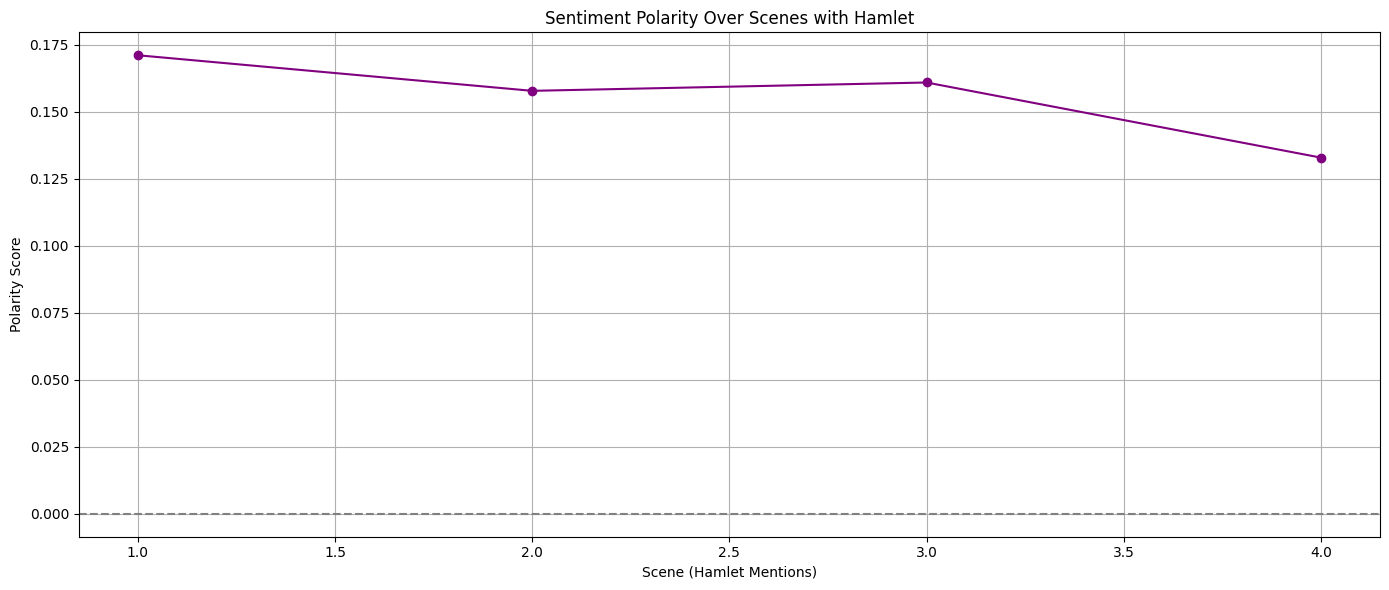

,Act,Scene,Polarity,Subjectivity,Scene ID
0,Act II,Scene 1,0.171007,0.554261,1
1,Act III,Scene 1,0.157738,0.558294,2
2,Act IV,Scene 1,0.160851,0.564638,3
3,Act V,Scene 1,0.132839,0.522248,4


In [13]:
# Redefining sentiment analysis for scenes where Hamlet is mentioned

hamlet_sentiments = []

for act_title, scenes in structured_play:
    for idx, scene_text in enumerate(scenes, 1):
        if "Hamlet" in scene_text:
            blob = TextBlob(scene_text)
            polarity = blob.sentiment.polarity
            subjectivity = blob.sentiment.subjectivity
            hamlet_sentiments.append({
                'Act': act_title,
                'Scene': f'Scene {idx}',
                'Polarity': polarity,
                'Subjectivity': subjectivity
            })

# Convert to DataFrame
hamlet_sentiment_df = pd.DataFrame(hamlet_sentiments)
hamlet_sentiment_df['Scene ID'] = range(1, len(hamlet_sentiment_df) + 1)

# Plot polarity over Hamlet's scenes
plt.figure(figsize=(14, 6))
plt.plot(hamlet_sentiment_df['Scene ID'], hamlet_sentiment_df['Polarity'], marker='o', color='purple')
plt.title('Sentiment Polarity Over Scenes with Hamlet')
plt.xlabel('Scene (Hamlet Mentions)')
plt.ylabel('Polarity Score')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

hamlet_sentiment_df.head()


#Notes:

Hamlet’s language is poetic and expressive

Sentiment tools interpret reflective, philosophical tone as mild positivity

#Sentiment analysis for Laertes

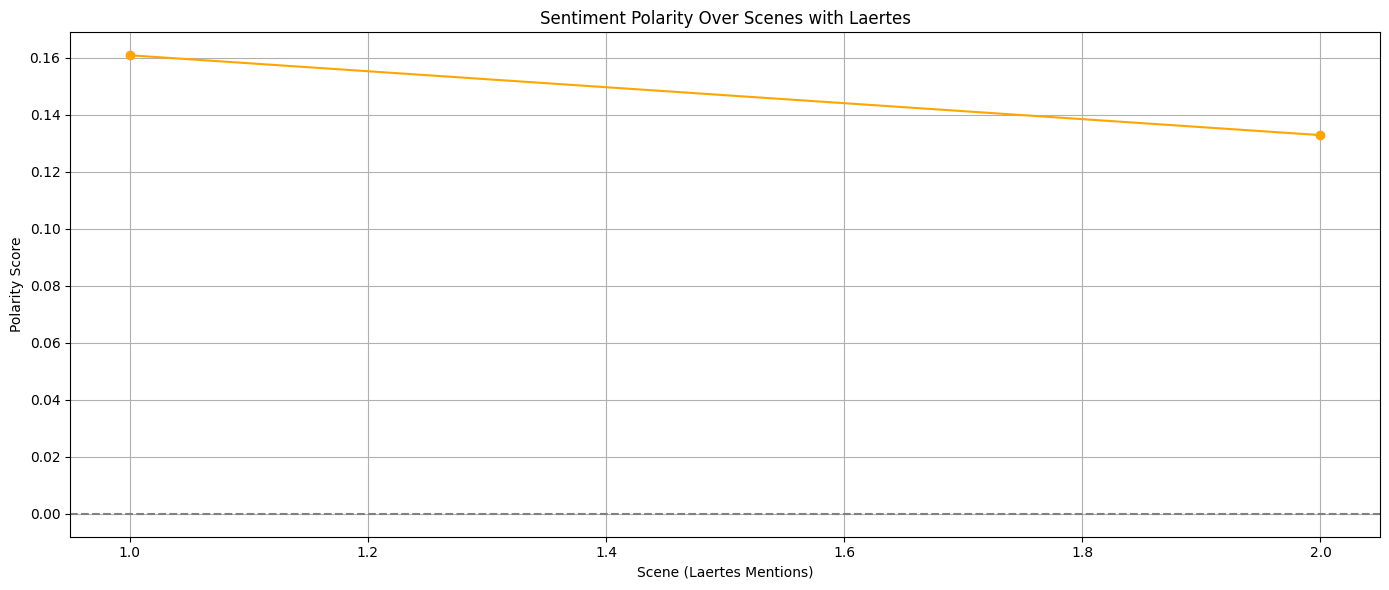

,Act,Scene,Polarity,Subjectivity,Scene ID
0,Act IV,Scene 1,0.160851,0.564638,1
1,Act V,Scene 1,0.132839,0.522248,2


In [14]:
# Redefining sentiment analysis for scenes where Laertes is mentioned

laertes_sentiments = []

for act_title, scenes in structured_play:
    for idx, scene_text in enumerate(scenes, 1):
        if "laertes" in scene_text.lower():
            blob = TextBlob(scene_text)
            polarity = blob.sentiment.polarity
            subjectivity = blob.sentiment.subjectivity
            laertes_sentiments.append({
                'Act': act_title,
                'Scene': f'Scene {idx}',
                'Polarity': polarity,
                'Subjectivity': subjectivity
            })

# Convert to DataFrame
laertes_sentiment_df = pd.DataFrame(laertes_sentiments)
laertes_sentiment_df['Scene ID'] = range(1, len(laertes_sentiment_df) + 1)

# Plot polarity over Laertes' scenes
plt.figure(figsize=(14, 6))
plt.plot(laertes_sentiment_df['Scene ID'], laertes_sentiment_df['Polarity'], marker='o', color='orange')
plt.title('Sentiment Polarity Over Scenes with Laertes')
plt.xlabel('Scene (Laertes Mentions)')
plt.ylabel('Polarity Score')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

laertes_sentiment_df.head()


In [15]:
# Count number of scenes that contain "laertes"
sum("laertes" in scene.lower() for _, scenes in structured_play for scene in scenes)


2

#Sentiment Analysis for Ophelia Scenes

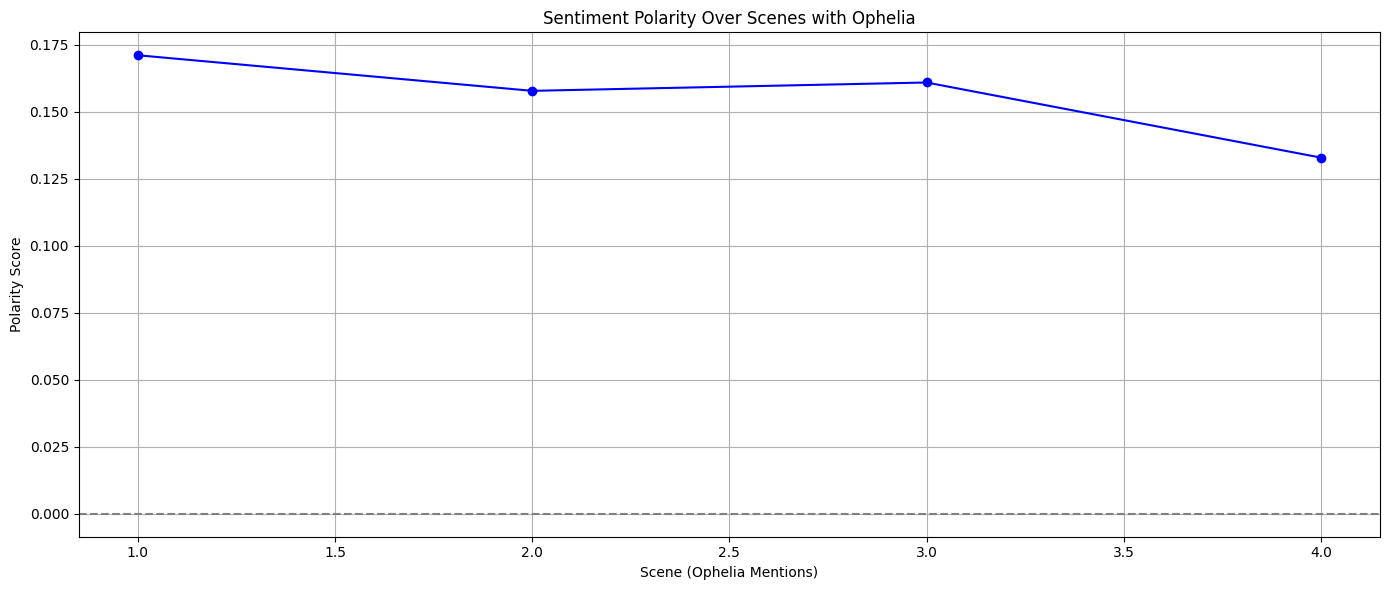

,Act,Scene,Polarity,Subjectivity,Scene ID
0,Act II,Scene 1,0.171007,0.554261,1
1,Act III,Scene 1,0.157738,0.558294,2
2,Act IV,Scene 1,0.160851,0.564638,3
3,Act V,Scene 1,0.132839,0.522248,4


In [16]:
# Perform sentiment analysis for scenes where Ophelia is mentioned

ophelia_sentiments = []

for act_title, scenes in structured_play:
    for idx, scene_text in enumerate(scenes, 1):
        if "ophelia" in scene_text.lower():
            blob = TextBlob(scene_text)
            polarity = blob.sentiment.polarity
            subjectivity = blob.sentiment.subjectivity
            ophelia_sentiments.append({
                'Act': act_title,
                'Scene': f'Scene {idx}',
                'Polarity': polarity,
                'Subjectivity': subjectivity
            })

# Convert to DataFrame
ophelia_sentiment_df = pd.DataFrame(ophelia_sentiments)
ophelia_sentiment_df['Scene ID'] = range(1, len(ophelia_sentiment_df) + 1)

# Plot polarity over Ophelia's scenes
plt.figure(figsize=(14, 6))
plt.plot(ophelia_sentiment_df['Scene ID'], ophelia_sentiment_df['Polarity'], marker='o', color='blue')
plt.title('Sentiment Polarity Over Scenes with Ophelia')
plt.xlabel('Scene (Ophelia Mentions)')
plt.ylabel('Polarity Score')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

ophelia_sentiment_df.head()


#Sentiment comparison for Hamlet and Ophelia across scenes


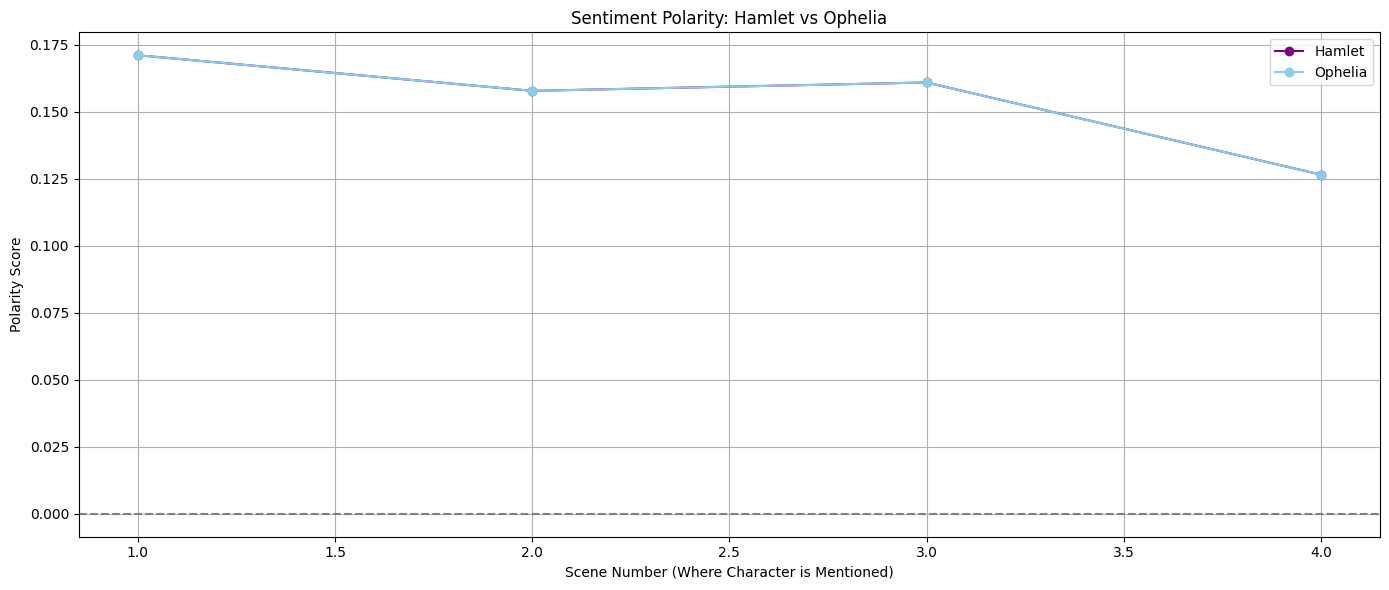

(               Scene  Polarity  Scene ID
 0   Act II - Scene 1  0.171007         1
 1  Act III - Scene 1  0.157738         2
 2   Act IV - Scene 1  0.160851         3
 3    Act V - Scene 1  0.126487         4,
                Scene  Polarity  Scene ID
 0   Act II - Scene 1  0.171007         1
 1  Act III - Scene 1  0.157738         2
 2   Act IV - Scene 1  0.160851         3
 3    Act V - Scene 1  0.126487         4)

In [20]:
hamlet_data = []
ophelia_data = []

for act_title, scenes in structured_play:
    for idx, scene_text in enumerate(scenes, 1):
        scene_id = f'{act_title} - Scene {idx}'
        blob = TextBlob(scene_text)
        polarity = blob.sentiment.polarity

        if "hamlet" in scene_text.lower():
            hamlet_data.append({'Scene': scene_id, 'Polarity': polarity})

        if "ophelia" in scene_text.lower():
            ophelia_data.append({'Scene': scene_id, 'Polarity': polarity})

# Convert to DataFrames
hamlet_df = pd.DataFrame(hamlet_data)
ophelia_df = pd.DataFrame(ophelia_data)

# Assign scene number for plotting
hamlet_df['Scene ID'] = range(1, len(hamlet_df) + 1)
ophelia_df['Scene ID'] = range(1, len(ophelia_df) + 1)

# Plot both characters' sentiment trends
plt.figure(figsize=(14, 6))
plt.plot(hamlet_df['Scene ID'], hamlet_df['Polarity'], marker='o', label='Hamlet', color='purple')
plt.plot(ophelia_df['Scene ID'], ophelia_df['Polarity'], marker='o', label='Ophelia', color='skyblue')

plt.title('Sentiment Polarity: Hamlet vs Ophelia')
plt.xlabel('Scene Number (Where Character is Mentioned)')
plt.ylabel('Polarity Score')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

hamlet_df.head(), ophelia_df.head()


#Sentiment comparison  Hamlet vs Gertrude sentiment across scenes

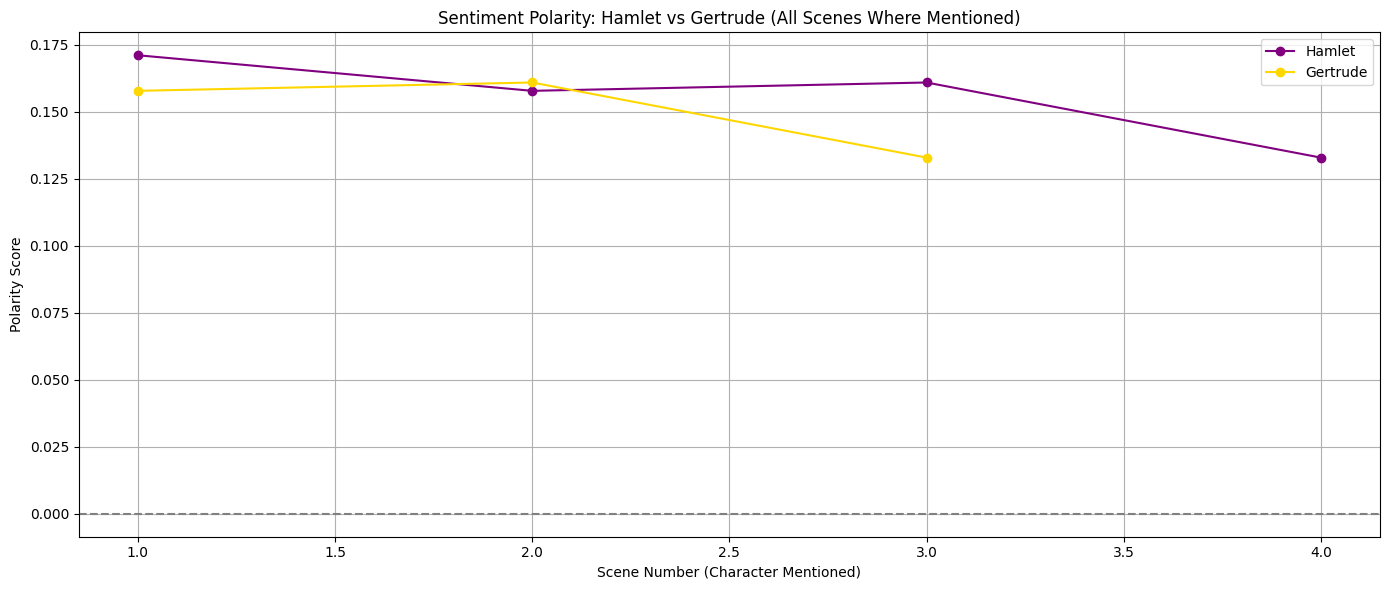

(               Scene  Polarity  Scene ID
 0   Act II - Scene 1  0.171007         1
 1  Act III - Scene 1  0.157738         2
 2   Act IV - Scene 1  0.160851         3
 3    Act V - Scene 1  0.132839         4,
                Scene  Polarity  Scene ID
 0  Act III - Scene 1  0.157738         1
 1   Act IV - Scene 1  0.160851         2
 2    Act V - Scene 1  0.132839         3)

In [23]:
hamlet_data = []
gertrude_data = []

for act_title, scenes in structured_play:
    for idx, scene_text in enumerate(scenes, 1):
        scene_id = f"{act_title} - Scene {idx}"
        blob = TextBlob(scene_text)
        polarity = blob.sentiment.polarity

        if "hamlet" in scene_text.lower():
            hamlet_data.append({'Scene': scene_id, 'Polarity': polarity})

        if "gertrude" in scene_text.lower():
            gertrude_data.append({'Scene': scene_id, 'Polarity': polarity})

# Convert to DataFrames
hamlet_df = pd.DataFrame(hamlet_data)
gertrude_df = pd.DataFrame(gertrude_data)

# Assign Scene IDs for plotting
hamlet_df['Scene ID'] = range(1, len(hamlet_df) + 1)
gertrude_df['Scene ID'] = range(1, len(gertrude_df) + 1)

# Plot sentiment trends
plt.figure(figsize=(14, 6))
plt.plot(hamlet_df['Scene ID'], hamlet_df['Polarity'], marker='o', label='Hamlet', color='purple')
plt.plot(gertrude_df['Scene ID'], gertrude_df['Polarity'], marker='o', label='Gertrude', color='gold')

plt.title('Sentiment Polarity: Hamlet vs Gertrude (All Scenes Where Mentioned)')
plt.xlabel('Scene Number (Character Mentioned)')
plt.ylabel('Polarity Score')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

hamlet_df.head(), gertrude_df.head()
